# Visualize Type Performance between SNMT and UNMT

In [60]:
!./type-performance.sh | tr '\n' ' '

de-en 40.1 38.5 34.4 33.6 fr-en 44.6 41.6 34.7 33.6 ro-en 42.5 40.3 33.5 33.0 en-de 24.3 24.0 24.0 23.5 en-fr 33.3 31.9 28.0 27.3 en-ro 30.6 29.8 23.8 23.5 

In [62]:
!ls -1 */typeperf.{s,u}nmt.tsv.tc.macrof

ls: cannot access */typeperf.snmt.tsv.tc.macrof: No such file or directory
ls: cannot access */typeperf.unmt.tsv.tc.macrof: No such file or directory


In [77]:
!head de-en/typeperf.*nmt.tsv.mc.macrof

==> de-en/typeperf.snmt.tsv.mc.macrof <==
MacroF[β=1]+average.macro+case.mixed+ngram.1+numrefs.1+smooth.add-k.1+tok.13a+version.1.4.13 38.45 ( BP = 1.000 ratio = 1.005 hyp_len = 47921 ref_len = 47673)


----
Type           	Score	Refs	Preds	Match	F1	Precisn	Recall
the            	77.26	2160	2660	1862	77.26	70.00	86.20
.              	91.96	2054	2002	1865	91.96	93.16	90.80
,              	74.52	2017	2344	1625	74.52	69.33	80.57
to             	71.04	1219	1115	829	71.04	74.35	68.01
of             	68.98	1054	1251	795	68.98	63.55	75.43

==> de-en/typeperf.unmt.tsv.mc.macrof <==
MacroF[β=1]+average.macro+case.mixed+ngram.1+numrefs.1+smooth.add-k.1+tok.13a+version.1.4.13 33.60 ( BP = 1.000 ratio = 1.007 hyp_len = 48018 ref_len = 47673)


----
Type           	Score	Refs	Preds	Match	F1	Precisn	Recall
the            	78.14	2160	2685	1893	78.14	70.50	87.64
.              	91.57	2054	2133	1917	91.57	89.87	93.33
,              	77.94	2017	2109	1608	77.94	76.24	79.72
to             	70.58	1219	1113

In [34]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


Bad key savefig.frameon in file /nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log fi

In [15]:
pairs = list(Path('.').glob('*-en')) + list(Path('.').glob('en-*'))
pairs

[PosixPath('de-en'),
 PosixPath('fr-en'),
 PosixPath('ro-en'),
 PosixPath('en-de'),
 PosixPath('en-fr'),
 PosixPath('en-ro')]

In [99]:

def load_typeperf(path: Path):
    assert path.exists()
    lines = path.read_text(encoding='utf8').splitlines()
    assert lines[4].startswith('Type')     # header is here
    lines = lines[4:]
    recs = [l.split() for l in lines]
    def format(row):
        return [row[0], float(row[1])] + [int(c) for c in row[2:5]] +  [float(c) for c in row[5:]]
    columns = recs[0]
    data =  [format(r) for r in recs[1:]]
    df = pd.DataFrame(data=data, columns=columns)

    df['CumF1'] = df['F1'].cumsum() / (df.index +1)
    df['CumP'] = df['Precisn'].cumsum() / (df.index +1)
    df['CumR'] = df['Recall'].cumsum() / (df.index +1)    
    return df

path = pairs[0] / 'typeperf.snmt.tsv.mc.macrof'
recs = load_typeperf(path)
recs

,Type,Score,Refs,Preds,Match,F1,Precisn,Recall,CumF1,CumP,CumR
0,the,77.26,2160,2660,1862,77.26,70.00,86.20,77.260000,70.000000,86.200000
1,.,91.96,2054,2002,1865,91.96,93.16,90.80,84.610000,81.580000,88.500000
2,",",74.52,2017,2344,1625,74.52,69.33,80.57,81.246667,77.496667,85.856667
3,to,71.04,1219,1115,829,71.04,74.35,68.01,78.695000,76.710000,81.395000
4,of,68.98,1054,1251,795,68.98,63.55,75.43,76.752000,74.078000,80.202000
...,...,...,...,...,...,...,...,...,...,...,...
10330,provinces,0.00,0,1,0,0.00,0.00,100.00,38.467166,66.751040,59.714996
10331,Spot,0.00,0,1,0,0.00,0.00,100.00,38.463443,66.744579,59.718895
10332,Algeciras,0.00,0,1,0,0.00,0.00,100.00,38.459720,66.738120,59.722793
10333,Mantee,0.00,0,1,0,0.00,0.00,100.00,38.455999,66.731662,59.726691


In [100]:
#def viz_pair(pair):
pair = pairs[0] 
snmt = pair / 'typeperf.snmt.tsv.mc.macrof'
unmt = pair / 'typeperf.unmt.tsv.mc.macrof'
snmt = load_typeperf(snmt)
unmt = load_typeperf(unmt)

/nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(-744.0480000000001, 10850.7, -5.0, 105.0)

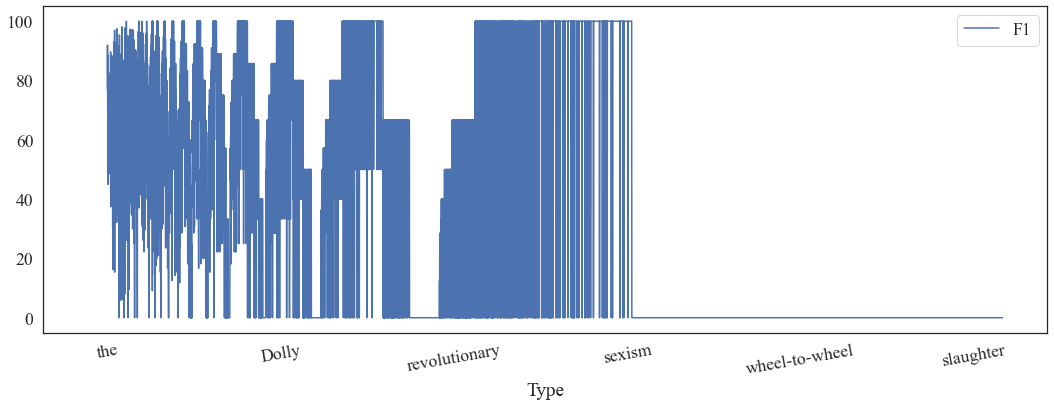

In [101]:
sns.set(font="Times New Roman", style='white',font_scale=1.6)
snmt.plot(x='Type', y=['F1'], logy=False, figsize=(18, 6))
x0, x1, y0, y1 = plt.axis()
margin_x = 0.02 * (x1- x0)
plt.xticks(rotation=10)
plt.axis((x0 - margin_x, x1, y0, y1))

In [173]:
# Refs column is same; drop the dupe
combo = snmt.merge(right=unmt.drop(columns=['Refs']), on='Type', how='inner', suffixes=('_s', '_u'))
combo = combo.sort_values(by=['Refs'], ascending=False).reindex()
for inp, out in  [('F1', 'CumF1'), ('Precisn', 'CumP'), ('Recall', 'CumR')]:
    for suff in ['_s', '_u']:
        combo[f'{out}{suff}'] = combo[f'{inp}{suff}'].cumsum() / pd.Series(range(1, len(combo)+1))
combo

,Type,Score_s,Refs,Preds_s,Match_s,F1_s,Precisn_s,Recall_s,CumF1_s,CumP_s,CumR_s,Score_u,Preds_u,Match_u,F1_u,Precisn_u,Recall_u,CumF1_u,CumP_u,CumR_u
0,the,77.26,2160,2660,1862,77.26,70.00,86.20,77.260000,70.000000,86.200000,78.14,2685,1893,78.14,70.50,87.64,78.140000,70.500000,87.640000
1,.,91.96,2054,2002,1865,91.96,93.16,90.80,84.610000,81.580000,88.500000,91.57,2133,1917,91.57,89.87,93.33,84.855000,80.185000,90.485000
2,",",74.52,2017,2344,1625,74.52,69.33,80.57,81.246667,77.496667,85.856667,77.94,2109,1608,77.94,76.24,79.72,82.550000,78.870000,86.896667
3,to,71.04,1219,1115,829,71.04,74.35,68.01,78.695000,76.710000,81.395000,70.58,1113,823,70.58,73.94,67.51,79.557500,77.637500,82.050000
4,of,68.98,1054,1251,795,68.98,63.55,75.43,76.752000,74.078000,80.202000,68.15,1279,795,68.15,62.16,75.43,77.276000,74.542000,80.726000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8423,Diocese,0.00,0,1,0,0.00,0.00,100.00,47.175248,81.861941,54.132908,0.00,2,0,0.00,0.00,100.00,43.412220,81.933160,50.030776
8422,JONES,0.00,0,1,0,0.00,0.00,100.00,47.180849,81.871660,54.151207,0.00,1,0,0.00,0.00,100.00,43.417374,81.942887,50.048588
8421,headaches,0.00,0,1,0,0.00,0.00,100.00,47.186451,81.881381,54.169511,0.00,1,0,0.00,0.00,100.00,43.422529,81.952617,50.066405
8420,Cymru,0.00,0,1,0,0.00,0.00,100.00,47.192054,81.891104,54.187819,0.00,1,0,0.00,0.00,100.00,43.427686,81.962349,50.084225


/nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Type'>

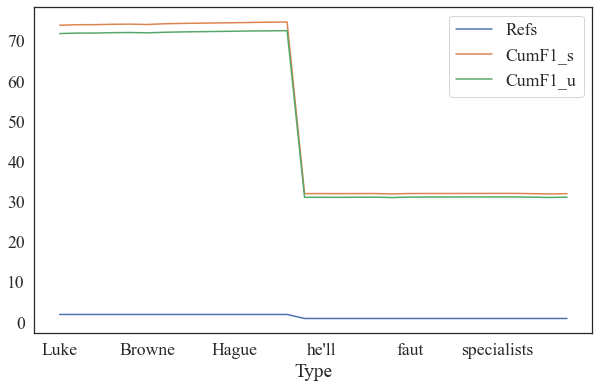

In [174]:
sns.set(font="Times New Roman", style='white',font_scale=1.6)
combo[3820:3850].plot(x='Type', y=['Refs', 'CumF1_s', 'CumF1_u'], logy=False, figsize=(10, 6), kind='line')
#'CumR_s', 'CumR_u'
#ylim=(0,100),

In [175]:
combo[3820:3850][['Refs', 'CumF1_s', 'CumF1_u']]

,Refs,CumF1_s,CumF1_u
2931,2,74.028264,71.958346
2927,2,74.163548,72.079419
2928,2,74.172369,72.088952
2925,2,74.265506,72.179952
2924,2,74.307990,72.221723
2929,2,74.215314,72.132608
2923,2,74.401802,72.280622
2921,2,74.486951,72.364319
2920,2,74.546686,72.423328
2919,2,74.606462,72.482377


In [133]:
help(combo.merge)

Help on method merge in module pandas.core.frame:

merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join

In [86]:
sub = combo
for meas in ['F1', 'Precisn', 'Recall']:
    for i in [1, 10, 100, 500, 1000, 5000, len(sub)]:
        print(meas, '%4d' % i, '%.2f' % sub[:i][f'{meas}_s'].mean(), '%.2f' % sub[:i][f'{meas}_u'].mean())

F1    1 77.26 78.14
F1   10 72.11 76.74
F1  100 64.70 66.61
F1  500 64.63 64.46
F1 1000 63.37 62.93
F1 5000 51.04 47.34
F1 8726 45.54 41.91
Precisn    1 70.00 70.50
Precisn   10 72.79 73.75
Precisn  100 67.50 67.72
Precisn  500 69.00 67.57
Precisn 1000 70.84 68.55
Precisn 5000 79.11 78.05
Precisn 8726 79.03 79.10
Recall    1 86.20 87.64
Recall   10 74.59 80.30
Recall  100 65.18 66.40
Recall  500 65.37 64.76
Recall 1000 63.66 63.01
Recall 5000 52.10 48.33
Recall 8726 52.31 48.35


In [91]:
for _, row in snmt.iterrows():
    print(row)
    print(row['Type'])
    break

Type         the
Score      77.26
Refs        2160
Preds       2660
Match       1862
F1         77.26
Precisn       70
Recall      86.2
Name: 0, dtype: object
the


In [97]:
snmt['F1'].cumsum() / (snmt.index +1)

0        77.260000
1        84.610000
2        81.246667
3        78.695000
4        76.752000
           ...    
10330    38.467166
10331    38.463443
10332    38.459720
10333    38.455999
10334    38.452278
Length: 10335, dtype: float64

In [98]:
unmt['F1'].cumsum() / (unmt.index +1)

0        78.140000
1        84.855000
2        82.550000
3        79.557500
4        77.276000
           ...    
10878    33.615639
10879    33.612550
10880    33.609461
10881    33.606372
10882    33.603284
Length: 10883, dtype: float64